# Project

## Customer Churn Prediction

### Importing necessary libraries 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Import Dataset

In [17]:
df = pd.read_csv("ecommerce_customer_churn_dataset.csv")

### Data cleaning and imputing

In [33]:
df["Churned"].value_counts(normalize=True) * 100
df = df.drop_duplicates()

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include="object").columns

# Fill missing values in numerical columns using median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values in categorical columns using mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove rows where target column is missing
df = df.dropna(subset=["Churned"])

# Fix invalid values
if "Age" in df.columns:
    df.loc[df["Age"] <= 0, "Age"] = df["Age"].median()

if "Session_Duration_Avg" in df.columns:
    df.loc[df["Session_Duration_Avg"] < 0, "Session_Duration_Avg"] = df["Session_Duration_Avg"].median()

# Ensure correct data type for target
df["Churned"] = df["Churned"].astype(int)

# Final verification
print("Final shape:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nData types:\n")
print(df.info())


Final shape: (20896, 25)

Missing values after cleaning:
 Age                              0
Gender                           0
Country                          0
City                             0
Membership_Years                 0
Login_Frequency                  0
Session_Duration_Avg             0
Pages_Per_Session                0
Cart_Abandonment_Rate            0
Wishlist_Items                   0
Total_Purchases                  0
Average_Order_Value              0
Days_Since_Last_Purchase         0
Discount_Usage_Rate              0
Returns_Rate                     0
Email_Open_Rate                  0
Customer_Service_Calls           0
Product_Reviews_Written          0
Social_Media_Engagement_Score    0
Mobile_App_Usage                 0
Payment_Method_Diversity         0
Lifetime_Value                   0
Credit_Balance                   0
Churned                          0
Signup_Quarter                   0
dtype: int64

Data types:

<class 'pandas.core.frame.DataFrame'>
Ra

### Exploratory Data Analysis Code Block

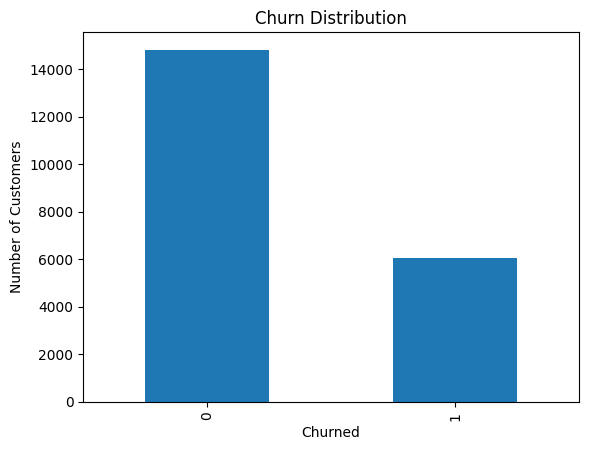

<Figure size 640x480 with 0 Axes>

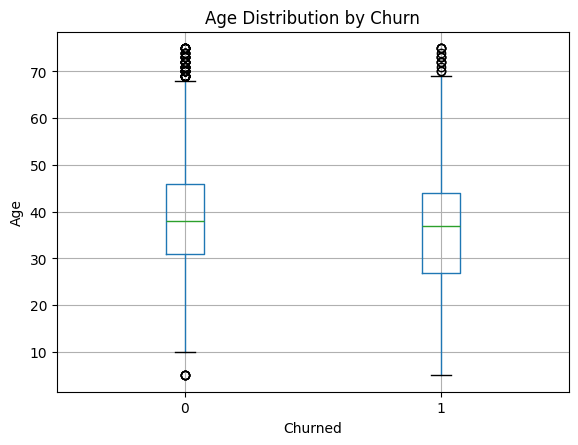

<Figure size 640x480 with 0 Axes>

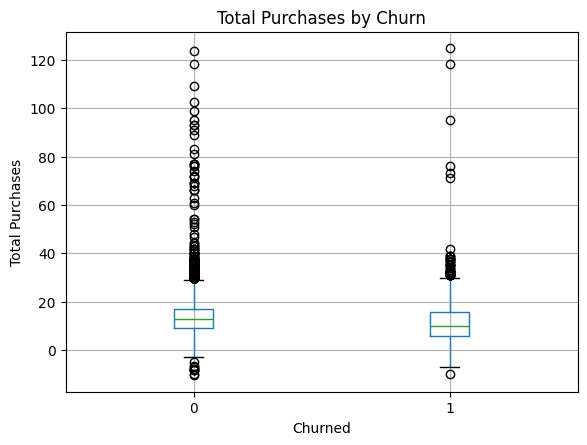

<Figure size 640x480 with 0 Axes>

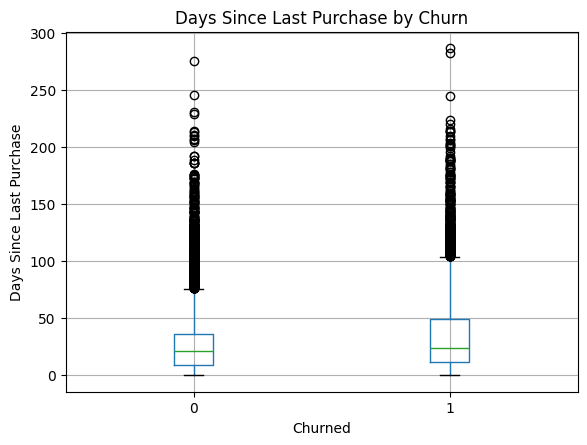

<Figure size 640x480 with 0 Axes>

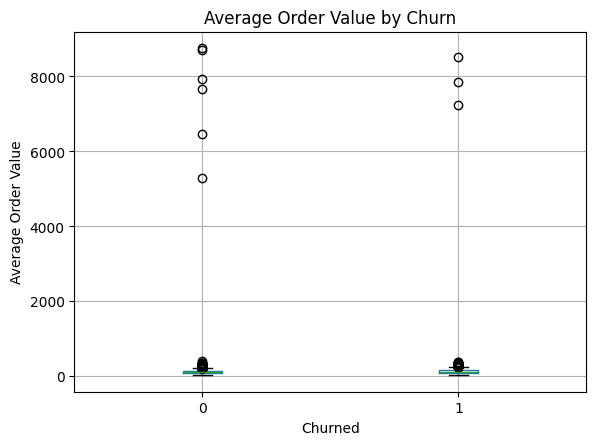

In [ ]:
# 1. Churn distribution
plt.figure()
df["Churned"].value_counts().plot(kind="bar")
plt.xlabel("Churned")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution")
plt.show()

# 2. Age vs Churn
plt.figure()
df.boxplot(column="Age", by="Churned")
plt.xlabel("Churned")
plt.ylabel("Age")
plt.title("Age Distribution by Churn")
plt.suptitle("")
plt.show()

# 3. Total Purchases vs Churn
plt.figure()
df.boxplot(column="Total_Purchases", by="Churned")
plt.xlabel("Churned")
plt.ylabel("Total Purchases")
plt.title("Total Purchases by Churn")
plt.suptitle("")
plt.show()

# 4. Days Since Last Purchase vs Churn
plt.figure()
df.boxplot(column="Days_Since_Last_Purchase", by="Churned")
plt.xlabel("Churned")
plt.ylabel("Days Since Last Purchase")
plt.title("Days Since Last Purchase by Churn")
plt.suptitle("")
plt.show()

# 5. Average Order Value vs Churn
plt.figure()
df.boxplot(column="Average_Order_Value", by="Churned")
plt.xlabel("Churned")
plt.ylabel("Average Order Value")
plt.title("Average Order Value by Churn")
plt.suptitle("")
plt.show()


### Encoding and Feature Preparation Code Block

In [37]:
# Separate target and features
X = df.drop("Churned", axis=1)
y = df["Churned"]

# Identify categorical columns
cat_cols = X.select_dtypes(include="object").columns

# Encode categorical columns using Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Final checks
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Churn distribution in training set:")
print(pd.Series(y_train).value_counts())

Training set shape: (16716, 24)
Testing set shape: (4180, 24)
Churn distribution in training set:
Churned
0    11856
1     4860
Name: count, dtype: int64


### Logistic Regression Training and Evaluation Code

Logistic Regression Accuracy: 0.7710526315789473

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2965
           1       0.68      0.40      0.51      1215

    accuracy                           0.77      4180
   macro avg       0.73      0.66      0.68      4180
weighted avg       0.76      0.77      0.75      4180



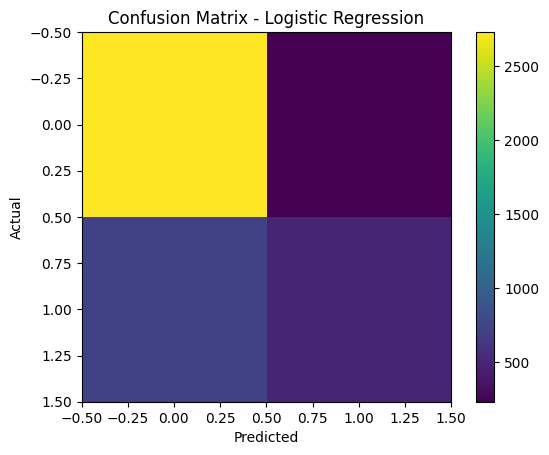

In [38]:

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

### Random Forest Training and Evaluation Code

Random Forest Accuracy: 0.9083732057416268

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2965
           1       0.93      0.74      0.83      1215

    accuracy                           0.91      4180
   macro avg       0.91      0.86      0.88      4180
weighted avg       0.91      0.91      0.91      4180



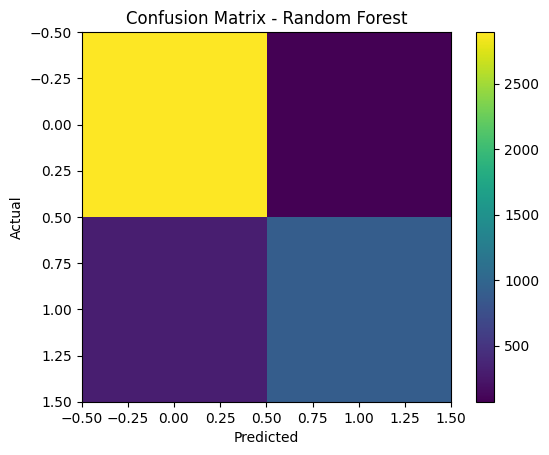

In [40]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

### Feature Importance Code

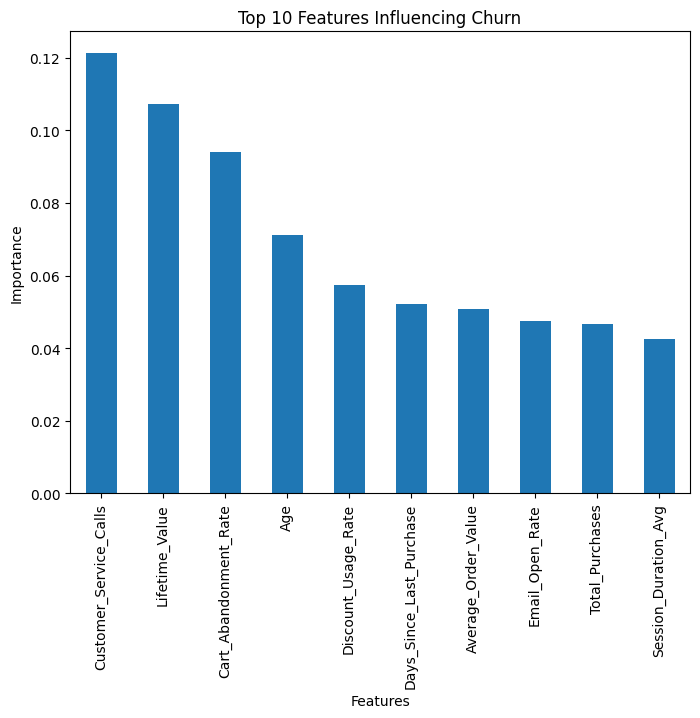

In [42]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### Save Model Code

In [44]:
import joblib

joblib.dump(rf_model, "customer_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

### Prediction Example Code

In [46]:
sample = X_test[0].reshape(1, -1)
prediction = rf_model.predict(sample)

if prediction[0] == 1:
    print("Customer will churn")
else:
    print("Customer will not churn")


Customer will churn


### Full Testing Code Block

In [47]:
# Create new customer data as a dictionary
new_customer = {
    "Age": 28,
    "Gender": "Male",
    "Country": "India",
    "City": "Mumbai",
    "Membership_Years": 1,
    "Login_Frequency": 5,
    "Session_Duration_Avg": 6.2,
    "Pages_Per_Session": 4,
    "Cart_Abandonment_Rate": 0.45,
    "Wishlist_Items": 2,
    "Total_Purchases": 3,
    "Average_Order_Value": 1200,
    "Days_Since_Last_Purchase": 60,
    "Discount_Usage_Rate": 0.7,
    "Returns_Rate": 0.2,
    "Email_Open_Rate": 0.3,
    "Customer_Service_Calls": 4,
    "Product_Reviews_Written": 0,
    "Social_Media_Engagement_Score": 20,
    "Mobile_App_Usage": 3,
    "Payment_Method_Diversity": 1,
    "Lifetime_Value": 3600,
    "Credit_Balance": 0,
    "Signup_Quarter": "Q2"
}

# Convert to DataFrame
new_df = pd.DataFrame([new_customer])

# Encode categorical columns same way as training
for col in new_df.select_dtypes(include="object").columns:
    new_df[col] = new_df[col].astype("category").cat.codes

# Ensure correct column order
new_df = new_df[X.columns]

# Scale data
new_scaled = scaler.transform(new_df)

# Make prediction
prediction = rf_model.predict(new_scaled)

# Output result
if prediction[0] == 1:
    print("Customer WILL churn")
else:
    print("Customer will NOT churn")


Customer will NOT churn
